Taller2

Ejecicio 1

In [8]:
from scipy.optimize import linprog


c = [-50, -30, -80]


A = [
    [4, 3, 5],   
    [2, 1, 3],  
    [1, 1, 2]    
]


b = [240, 100, 120]


x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)


res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='highs')


if res.success:
    x, y, z = res.x
    utilidad = -res.fun
    print(f"Mesas (x): {x:.2f}")
    print(f"Sillas (y): {y:.2f}")
    print(f"Escritorios (z): {z:.2f}")
    print(f"Utilidad máxima: ${utilidad:.2f}")
else:
    print("No  hay solución ")


Mesas (x): 0.00
Sillas (y): 55.00
Escritorios (z): 15.00
Utilidad máxima: $2850.00


GRAFICA

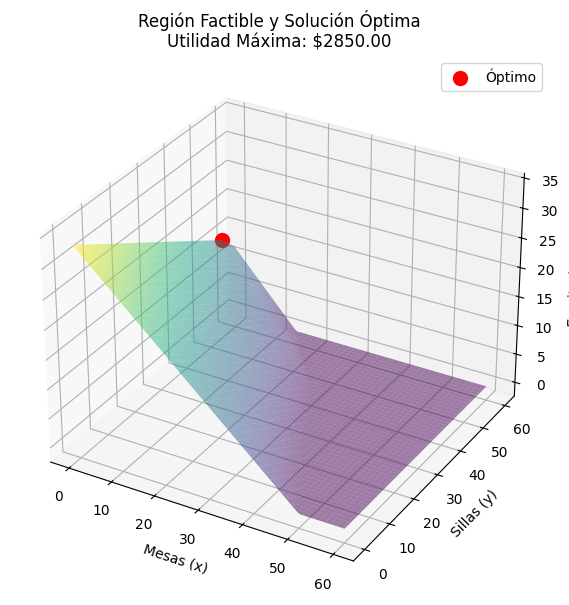

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import linprog

# Función objetivo (negativos porque linprog minimiza)
c = [-50, -30, -80]

# Restricciones
A = [
    [4, 3, 5],   # Carpintería
    [2, 1, 3],   # Acabado
    [1, 1, 2]    # Almacenamiento
]
b = [240, 100, 120]

# Límites
bounds = [(0, None), (0, None), (0, None)]

# Resolver
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
x_opt, y_opt, z_opt = res.x
Z_opt = -res.fun

# Crear malla de puntos para graficar
x = np.linspace(0, 60, 100)
y = np.linspace(0, 60, 100)
X, Y = np.meshgrid(x, y)

# Calcular Z máximo permitido por cada restricción
Z1 = (240 - 4*X - 3*Y) / 5   # Carpintería
Z2 = (100 - 2*X - 1*Y) / 3   # Acabado
Z3 = (120 - 1*X - 1*Y) / 2   # Almacenamiento

# Región factible: mínimo de las tres restricciones
Z = np.minimum(np.minimum(Z1, Z2), Z3)
Z = np.maximum(Z, 0)  # Eliminar valores negativos

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')
ax.scatter(x_opt, y_opt, z_opt, color='red', s=100, label='Óptimo')
ax.set_xlabel('Mesas (x)')
ax.set_ylabel('Sillas (y)')
ax.set_zlabel('Escritorios (z)')
ax.set_title(f'Región Factible y Solución Óptima\nUtilidad Máxima: ${Z_opt:.2f}')
ax.legend()
plt.show()


EJERCICIO 2

In [5]:
from scipy.optimize import linprog


c = [-5, -4, -3]


A = [
    [25, 10, 1],   
    [5, 4, 4],  
    [2, 20, 8]    
]


b = [80, 60, 30]


x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)


res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='highs')


if res.success:
    x, y, z = res.x
    utilidad = -res.fun
    print(f"Proteina (x): {x:.2f}")
    print(f"Creatinina (y): {y:.2f}")
    print(f"Multivitaminicos (z): {z:.2f}")
    print(f"Utilidad máxima: ${utilidad:.2f}")
else:
    print("No se encontró solución óptima.")

Proteina (x): 3.08
Creatinina (y): 0.00
Multivitaminicos (z): 2.98
Utilidad máxima: $24.34


GRAFICA

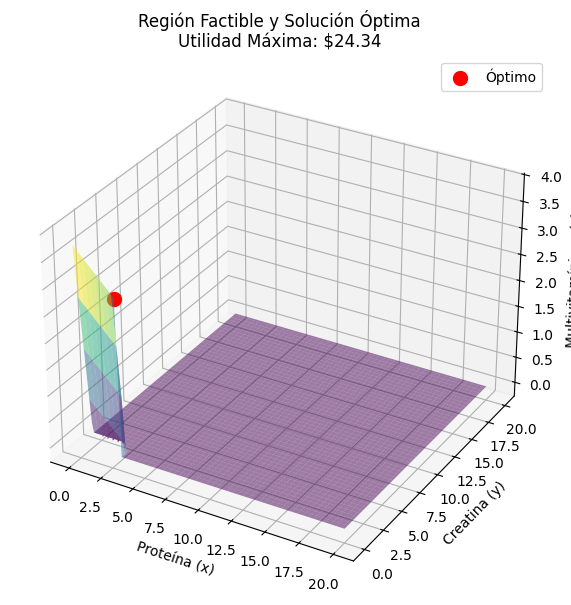

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import linprog


c = [-5, -4, -3]


A = [
    [25, 10, 1],   # Restricción 1
    [5, 4, 4],     # Restricción 2
    [2, 20, 8]     # Restricción 3
]
b = [80, 60, 30]

# Límites
bounds = [(0, None), (0, None), (0, None)]

# Resolver
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
x_opt, y_opt, z_opt = res.x
Z_opt = -res.fun

# Crear malla de puntos
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)

# Calcular Z máximo permitido por cada restricción
Z1 = (80 - 25*X - 10*Y) / 1    # Restricción 1
Z2 = (60 - 5*X - 4*Y) / 4      # Restricción 2
Z3 = (30 - 2*X - 20*Y) / 8     # Restricción 3

# Región factible: mínimo de las tres restricciones
Z = np.minimum(np.minimum(Z1, Z2), Z3)
Z = np.maximum(Z, 0)  # Eliminar valores negativos

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')
ax.scatter(x_opt, y_opt, z_opt, color='red', s=100, label='Óptimo')
ax.set_xlabel('Proteína (x)')
ax.set_ylabel('Creatina (y)')
ax.set_zlabel('Multivitamínicos (z)')
ax.set_title(f'Región Factible y Solución Óptima\nUtilidad Máxima: ${Z_opt:.2f}')
ax.legend()
plt.show()


In [8]:
import pulp

# Definir el modelo
modelo = pulp.LpProblem("Ejercicio_2.0", pulp.LpMaximize)

# Variables
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)

# Función objetivo
modelo += 3*x1 + 4*x2 + 1.5*x3, "Z"

# Restricciones
modelo += -x1 - 2*x2 >= -10   # equivalente a x1 + 2x2 <= 10
modelo += 2*x1 + 2*x2 + x3 <= 10

# Resolver
modelo.solve()

# Resultados
print("Estado:", pulp.LpStatus[modelo.status])
print("x1 =", pulp.value(x1))
print("x2 =", pulp.value(x2))
print("x3 =", pulp.value(x3))
print("Z =", pulp.value(modelo.objective))

Estado: Optimal
x1 = 0.0
x2 = 5.0
x3 = 0.0
Z = 20.0


EJERCIOCIO 3

In [9]:
import pulp

# Definir el modelo
modelo = pulp.LpProblem("Ejercicio_2", pulp.LpMaximize)

# Variables de decisión: cajas de A y B
A = pulp.LpVariable("A", lowBound=0, cat='Continuous')  # Cajas de A
B = pulp.LpVariable("B", lowBound=0, cat='Continuous')  # Cajas de B

# Función objetivo: Maximizar el ingreso
modelo += 0.75*A + 0.50*B, "Ingreso Total"

# Restricciones: volumen y peso
modelo += 3*A + 2*B <= 2400, "Restricción volumen"
modelo += 3*A + 5*B <= 36800, "Restricción peso"

# Resolver el modelo
modelo.solve()

# Resultados
print("Estado:", pulp.LpStatus[modelo.status])
print("Cajas de A =", pulp.value(A))
print("Cajas de B =", pulp.value(B))
print("Ingreso máximo =", pulp.value(modelo.objective))

Estado: Optimal
Cajas de A = 0.0
Cajas de B = 1200.0
Ingreso máximo = 600.0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /workspaces/lineal2/venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/a304958d9adf4c1fa4c6a9e41864c373-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/a304958d9adf4c1fa4c6a9e41864c373-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-1) rows, 2 (0) columns and 2 (-2) elements
0  Obj -0 Primal inf 800 (1) Dual inf 1.499998 (2)
2  Obj 600
Optimal - objective value 600
After Postsolve, objective 600, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 600 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock 

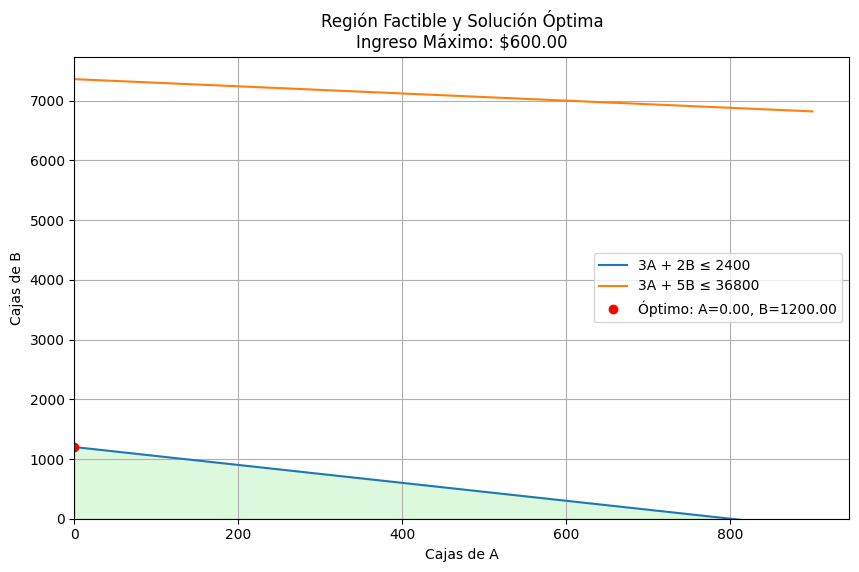

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

# Definir el modelo
modelo = pulp.LpProblem("Ejercicio_2", pulp.LpMaximize)

# Variables
A = pulp.LpVariable("A", lowBound=0)
B = pulp.LpVariable("B", lowBound=0)

# Función objetivo
modelo += 0.75*A + 0.50*B

# Restricciones
modelo += 3*A + 2*B <= 2400
modelo += 3*A + 5*B <= 36800

# Resolver
modelo.solve()
A_opt = pulp.value(A)
B_opt = pulp.value(B)
Z_opt = pulp.value(modelo.objective)

# Crear valores para graficar restricciones
a_vals = np.linspace(0, 900, 400)
b1 = (2400 - 3*a_vals) / 2
b2 = (36800 - 3*a_vals) / 5

# Graficar región factible
plt.figure(figsize=(10, 6))
plt.plot(a_vals, b1, label='3A + 2B ≤ 2400')
plt.plot(a_vals, b2, label='3A + 5B ≤ 36800')
plt.fill_between(a_vals, 0, np.minimum(b1, b2), where=(np.minimum(b1, b2) >= 0), alpha=0.3, color='lightgreen')

# Marcar solución óptima
plt.plot(A_opt, B_opt, 'ro', label=f'Óptimo: A={A_opt:.2f}, B={B_opt:.2f}')
plt.xlabel('Cajas de A')
plt.ylabel('Cajas de B')
plt.title(f'Región Factible y Solución Óptima\nIngreso Máximo: ${Z_opt:.2f}')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.show()


EJERCICIO 4

In [10]:
import pulp

# Definimos el problema (maximización)
modelo = pulp.LpProblem("Ejercicio_1", pulp.LpMaximize)

# Variables de decisión: cantidad de productos X, Y y Z a producir
X = pulp.LpVariable("X", lowBound=0, cat='Continuous')  # Producto X
Y = pulp.LpVariable("Y", lowBound=0, cat='Continuous')  # Producto Y
Z = pulp.LpVariable("Z", lowBound=0, cat='Continuous')  # Producto Z

# Función objetivo: Maximizar la utilidad
modelo += 6*X + 8*Y + 12*Z, "Utilidad Total"

# Restricciones: tiempo de máquina y tiempo de acabado
modelo += X + 2*Y + 3*Z <= 900, "Restricción tiempo máquina"
modelo += 4*X + 4*Y + 8*Z <= 5000, "Restricción tiempo acabado"

# Resolver el modelo
modelo.solve()

# Resultados
print("Estado:", pulp.LpStatus[modelo.status])
print("X =", pulp.value(X))
print("Y =", pulp.value(Y))
print("Z =", pulp.value(Z))
print("Utilidad máxima =", pulp.value(modelo.objective))

Estado: Optimal
X = 900.0
Y = 0.0
Z = 0.0
Utilidad máxima = 5400.0


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /workspaces/lineal2/venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/6d3addf875a04e7bb1af54652d117c8c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/6d3addf875a04e7bb1af54652d117c8c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 17 RHS
At line 20 BOUNDS
At line 21 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 36 (3)
0  Obj -0 Dual inf 36 (3)
2  Obj 5400
Optimal - objective value 5400
Optimal objective 5400 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



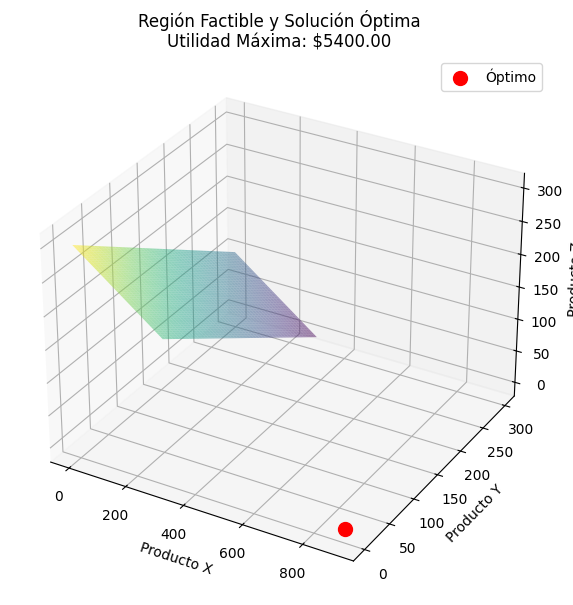

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp

# Definir el modelo
modelo = pulp.LpProblem("Ejercicio_1", pulp.LpMaximize)

# Variables
X = pulp.LpVariable("X", lowBound=0)
Y = pulp.LpVariable("Y", lowBound=0)
Z = pulp.LpVariable("Z", lowBound=0)

# Función objetivo
modelo += 6*X + 8*Y + 12*Z

# Restricciones
modelo += X + 2*Y + 3*Z <= 900
modelo += 4*X + 4*Y + 8*Z <= 5000

# Resolver
modelo.solve()
X_opt = pulp.value(X)
Y_opt = pulp.value(Y)
Z_opt = pulp.value(Z)
Z_total = pulp.value(modelo.objective)

# Crear malla de puntos
x_vals = np.linspace(0, 300, 100)
y_vals = np.linspace(0, 300, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Restricción 1: X + 2Y + 3Z ≤ 900 → despejamos Z
Z1 = (900 - X_grid - 2*Y_grid) / 3

# Restricción 2: 4X + 4Y + 8Z ≤ 5000 → despejamos Z
Z2 = (5000 - 4*X_grid - 4*Y_grid) / 8

# Región factible: mínimo de ambas restricciones
Z_region = np.minimum(Z1, Z2)
Z_region = np.maximum(Z_region, 0)  # Eliminar negativos

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_region, alpha=0.5, cmap='viridis', edgecolor='none')
ax.scatter(X_opt, Y_opt, Z_opt, color='red', s=100, label='Óptimo')
ax.set_xlabel('Producto X')
ax.set_ylabel('Producto Y')
ax.set_zlabel('Producto Z')
ax.set_title(f'Región Factible y Solución Óptima\nUtilidad Máxima: ${Z_total:.2f}')
ax.legend()
plt.show()
